In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

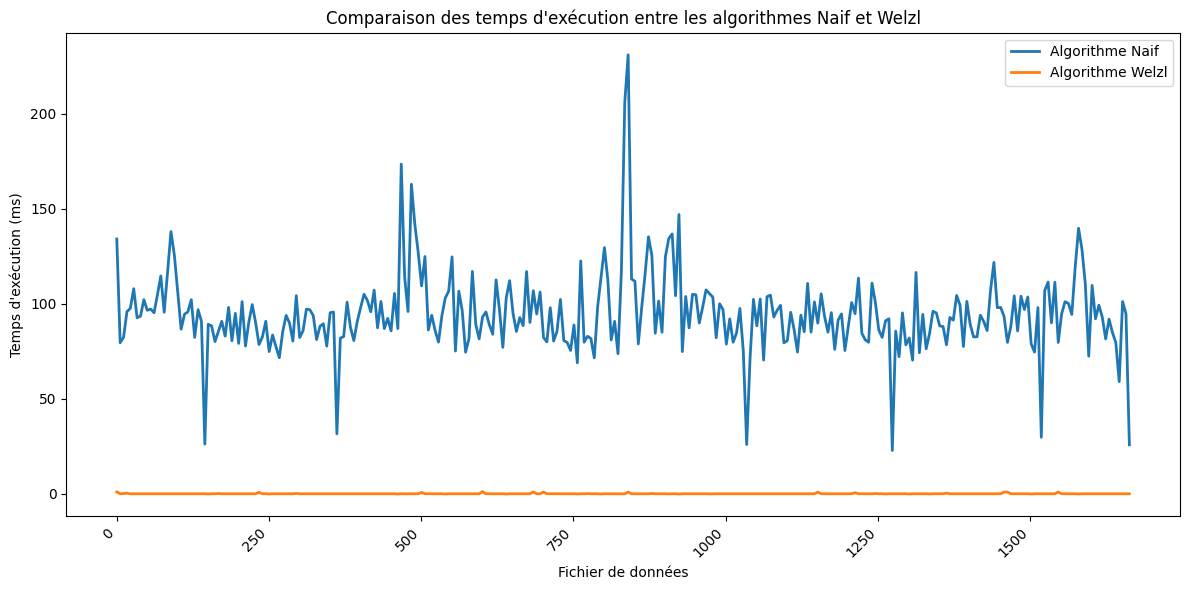

In [55]:

def plot_execution_times(data_file, output_file):
    # Initialisation des listes pour stocker les données
    filenames = []
    execution_times_naif = []
    execution_times_welzl = []

    # Lecture du fichier de données
    with open(data_file, 'r') as file:
        # Ignorer la première ligne contenant les noms des colonnes
        next(file)
        for line in file:
            # Séparation des données sur la virgule
            parts = line.strip().split(',')
            filenames.append(parts[0])
            execution_times_naif.append(int(float(parts[1])))
            execution_times_welzl.append(int(float(parts[2])))

    # Création du graphe
    plt.figure(figsize=(12, 6))
    # Lissage des courbes
    x = np.linspace(0, len(filenames), 300)  # Crée une série de points pour lisser les courbes
    spline_naif = make_interp_spline(range(len(filenames)), execution_times_naif, k=2)  # Interpolation spline
    spline_welzl = make_interp_spline(range(len(filenames)), execution_times_welzl, k=2)  # Interpolation spline
    y_smooth_naif = spline_naif(x)
    y_smooth_welzl = spline_welzl(x)
    
    # Tracé des courbes lissées
    plt.plot(x, y_smooth_naif, label='Algorithme Naif', linewidth=2)
    plt.plot(x, y_smooth_welzl, label='Algorithme Welzl', linewidth=2)
    
    # plt.plot(filenames, execution_times_naif, label='Algorithme Naif', color='red')
    # plt.plot(filenames, execution_times_welzl, label='Algorithme Welzl', color='blue')
    plt.xlabel('Fichier de données')
    plt.ylabel('Temps d\'exécution (ms)')
    plt.title('Comparaison des temps d\'exécution entre les algorithmes Naif et Welzl')
    plt.legend()
    plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes de l'axe x pour une meilleure lisibilité
    plt.tight_layout()

    # Sauvegarde de l'image
    plt.savefig(output_file)

    # Affichage du graphe
    plt.show()

# Exemple d'utilisation de la fonction avec un fichier de données
plot_execution_times('./results/dataFile_256points.txt', './graphs/graph_Naif_Welzl_256points.png')


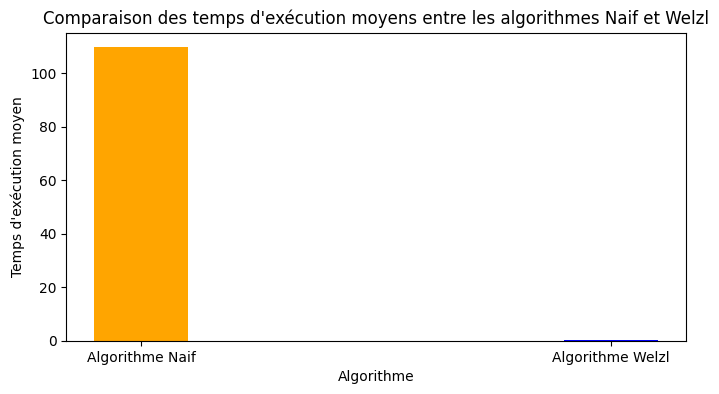

<Figure size 640x480 with 0 Axes>

In [47]:
def plot_execution_times_mean_histo(data_file,output_file):
    # Initialisation des listes pour stocker les données
    filenames = []
    execution_times_naif = []
    execution_times_welzl = []

    # Lecture du fichier de données
    with open(data_file, 'r') as file:
        # Ignorer la première ligne contenant les noms des colonnes
        next(file)
        for line in file:
            # Séparation des données sur la virgule
            parts = line.strip().split(',')
            filenames.append(parts[0])
            execution_times_naif.append(int(parts[1]))
            execution_times_welzl.append(int(parts[2]))

    # Calcul de la moyenne des temps d'exécution pour chaque algorithme
    mean_naif = sum(execution_times_naif) / len(execution_times_naif)
    mean_welzl = sum(execution_times_welzl) / len(execution_times_welzl)

    # Création de l'histogramme
    plt.figure(figsize=(8, 4))
    index = np.arange(2)  # Positions des barres
    plt.bar(index, [mean_naif, mean_welzl], color=['orange', 'blue'], width=0.2, label=['Algorithme Naif', 'Algorithme Welzl'])
    plt.xticks(index, ['Algorithme Naif', 'Algorithme Welzl']) 
    plt.xlabel('Algorithme')
    plt.ylabel('Temps d\'exécution moyen')
    plt.title('Comparaison des temps d\'exécution moyens entre les algorithmes Naif et Welzl')
    plt.show()
    # Sauvegarde de l'image
    plt.savefig(output_file)

# Appel de la fonction avec le chemin du fichier de données
plot_execution_times_mean_histo('./results/dataFile_256points.txt', './graphs/graph_Naif_Welzl_256points_histo_mean.png')

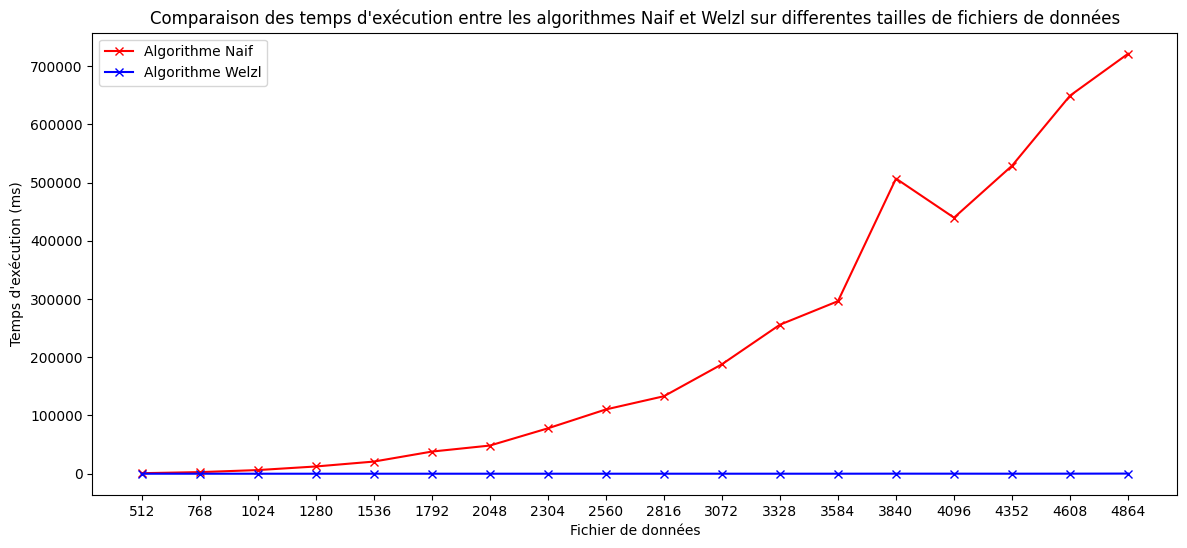

In [39]:
def plot_execution_times_combiningFiles(data_file, output_file):
     # Initialisation des listes pour stocker les données
    point_counts = [512, 768, 1024, 1280, 1536, 1792, 2048, 2304, 2560, 2816, 3072, 3328, 3584, 3840, 4096, 4352, 4608, 4864]
    execution_times_naif = []
    execution_times_welzl = []
    
    # Lecture du fichier de données
    with open(data_file, 'r') as file:
        # Ignorer la première ligne contenant les noms des colonnes
        next(file)
        for line in file:
            # Séparation des données sur la virgule
            parts = line.strip().split(',')
            # filenames.append(parts[0])
            execution_times_naif.append(int(float(parts[0])))
            execution_times_welzl.append(int(float(parts[1])))
    # Création du graphe
    plt.figure(figsize=(14, 6))
    
    plt.plot(point_counts, execution_times_naif, label='Algorithme Naif', color='red',marker='x')
    plt.plot(point_counts, execution_times_welzl, label='Algorithme Welzl', color='blue',marker='x')
    plt.xlabel('Fichier de données')
    plt.ylabel('Temps d\'exécution (ms)')
    plt.title('Comparaison des temps d\'exécution entre les algorithmes Naif et Welzl sur differentes tailles de fichiers de données')
    plt.legend()
    # plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes de l'axe x pour une meilleure lisibilité
    # plt.tight_layout()

    # Définir les valeurs de l'axe x
    plt.xticks(point_counts)
    # Sauvegarde de l'image
    plt.savefig(output_file)

    # Affichage du graphe
    plt.show()

# Appel de la fonction avec le chemin du fichier et le nom du fichier de sortie
plot_execution_times_combiningFiles('./results/dataFile_combiningPoints.txt', './graphs/graph_Naif_Welzl_combiningPoints.png')